In [1]:
import sys
sys.path.append('../src')

In [2]:
from spatial_transfer import StyleTransfer
from utils import imshow
from masks import *

In [3]:
import torch
import math

def get_masks_1(imsize=128):
    masks=[get_side_mask(imsize, "left"), get_corner_mask(imsize, "upper_right")]
    masks = torch.stack(masks)
    return masks

def get_masks_2(imsize=128):
    masks=[get_corner_mask(imsize, "lower_left"),
           get_circular_mask(imsize, int(imsize/2), int(imsize/4), int(imsize/4))]#get_side_mask(imsize, "up")]
    masks = torch.stack(masks)
    return masks

In [4]:
st = StyleTransfer()

Using default pre-trained network
Using default style and content layers


In [5]:
style_paths = ['./images/picasso.jpg', './images/klee.jpg']
content_path  = './images/dancing.jpg'

masks_1 = get_masks_1()
masks_2 = get_masks_2()

In [6]:
output_1 = st.run_style_transfer(content_path, style_paths, spatial_mask=masks_1, num_steps=5)

Building the style transfer model..
Optimizing..


In [7]:
output_2 = st.run_style_transfer(content_path, style_paths, spatial_mask=masks_2, num_steps=5)

Building the style transfer model..
Optimizing..


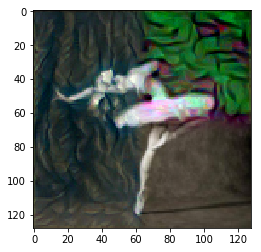

In [8]:
imshow(output_1)

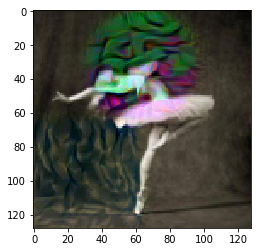

In [9]:
imshow(output_2)